# WWW-COURSERA-DOWNLOADER

Originally created by Jansen Simanullang, 2018.

My previous version of `www-coursera-downloader` dated back from 2016 is no longer working.

Sorry for the frustation of many people who have download my previous `www-coursera-downloader` and cannot use it.


## A. Requirements

### (1) Install Geckodriver
Install Geckodriver from : https://github.com/mozilla/geckodriver/releases/

#### Check Geckodriver version

In [1]:
!echo == GECKODRIVER ==:
!geckodriver --version

== GECKODRIVER ==:
geckodriver 0.20.1

The source code of this program is available from
testing/geckodriver in https://hg.mozilla.org/mozilla-central.

This program is subject to the terms of the Mozilla Public License 2.0.
You can obtain a copy of the license at https://mozilla.org/MPL/2.0/.


### (2) Install Some Python Packages

In [2]:
!pip install -q splinter wget jupyter_contrib_nbextensions

In [3]:
from splinter import Browser
import os, time, wget
from bs4 import BeautifulSoup

## B. Definitions

### B. 1 Some constants

In [4]:
# adjust loading+time to your network speed~!
loading_time = 10

In [5]:
homepage='https://www.coursera.org'

In [6]:
resolution = {'low':'360','med':'540','hi':'720'}
# adjust chosen_res to your liking
chosen_res = 'hi'

In [7]:
browser = Browser('firefox', headless = True)

### B.2 Helper Function 

In [8]:
def screenshot():
    browser.driver.save_screenshot('screenshot.png')
    from PIL import Image
    return Image.open('screenshot.png')

In [9]:
import base64

def encode_cjson(text):
    return base64.b64encode(bytes(str(text), "utf-8"))

def save_cjson(text):
    text = encode_cjson(text)
    with open('coursera.json','wb+') as f:
        f.write(bytes(str(text),"utf-8"))
    f.close()

def read_cjson():
    import os
    if os.path.isfile('coursera.json'):
        with open('coursera.json','rb') as f:
            a = f.read()
        f.close()
    else:
        print('credential file not found')
    return str(a).split("'")[1]

def decode_cjson(text):
    return str(base64.b64decode(text)).split("'")[1]

def get_cjson():
    import json
    text = read_cjson()
    
    uid = json.loads(decode_cjson(text))
    return uid

def remove_cjson():
    import os
    if os.path.isfile('coursera.json'):
        os.remove('coursera.json')

def get_credential():
    import getpass, os
    if os.path.isfile('coursera.json'):
        username = get_cjson()['user']
        password = get_cjson()['password']
    else:
        username = input('User Name:')
        password = getpass.getpass('Password:')
        text = '{"user":"'+username+'", "password":"'+password+'"}'
        save_cjson(text)
        
    return username, password

def remove_credential():
    remove_cjson()
    print('credential removed...')
    return

def reset_credential():
    remove_cjson()
    username, password = get_credential()
    return username, password

In [ ]:
def get_lectures():
    
    browser.visit(lecture_homepage)
    week = browser.find_by_css('#rendered-content > div > div > div > div.rc-CourseNavigation > nav > div.rc-WeekCollectionNavigationItem > div')
    anchors = BeautifulSoup(week.html, 'lxml').findAll('a', attrs={})
    weeks = []
    for a in anchors:
        weeks.append(a['href'])
    weeks
    weeks.pop(0)
   
    for i, week in enumerate(weeks):
        
        browser.visit(homepage + week)
        time.sleep(loading_time)

        lessons_ = browser.find_by_tag('#rendered-content > div > div > div > main > div > div > div > div > div > div.horizontal-box.wrap > div > section > div.rc-ModuleLessons > div > div ').find_by_tag('ul')
        lessons_urls = []
        lessons_titles = []

        for url in lessons_:
            
            anchors = BeautifulSoup(url.html, 'lxml').findAll('a', attrs={})
            
            for j, a in enumerate(anchors):
                spans = a.findAll('h5')
                
                for span in spans:
                    spantext = (span.text)
                    
                    if 'Lecture' in spantext:
                        
                        lesson_number = j+1
                        lesson_title = spantext.replace('Lecture','Lecture '+ str(lesson_number)+' ')
                        lesson_url = a['href']
                        
                        lessons_urls.append(lesson_url)
                        lessons_titles.append(lesson_title)
                        
                        print(lesson_title, lesson_url,sep='\n')
                        print()

        lessons = list(zip(lessons_urls, lessons_titles))
        
        download_week_lessons(lessons, i, browser)
        
        print()
    
    print('Download from "' + lecture_homepage + '" finished')
    
    return

In [ ]:
def download_week_lessons(lessons, i, browser):
    
    
    for url, title in lessons:
        
        filename = 'Week-'+str(i+1) +'-'+ title + '.mp4'
        filename = filename.replace(' ','_')
        full_url = homepage + url
        browser.visit(full_url)
        time.sleep(loading_time)
        screenshot()
        mp4 = browser.find_by_tag('video').find_by_tag('source')['src']
        mp4 = mp4.replace('360p/',resolution[chosen_res]+'p/')
        print('currently downloading: '+ filename)
        wget.download(mp4)
        filename = filename.replace('.mp4',  '-' + chosen_res + '.mp4')
        os.rename('index.mp4',filename)


## C. Coursera

### Login Page

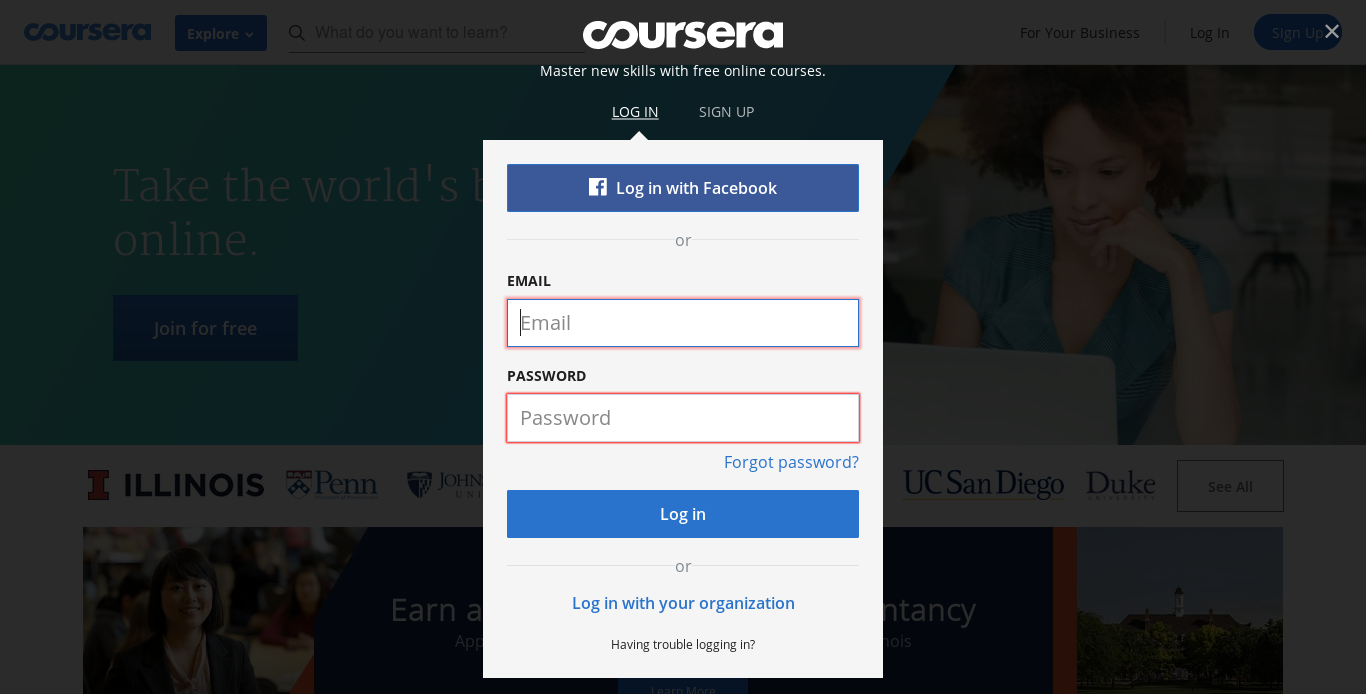

In [10]:
browser.visit('https://www.coursera.org/?authMode=login')
screenshot()

### Insert Login Credential

In [11]:
username, password = get_credential()

In [12]:
browser.fill('email', username)
browser.fill('password', password)

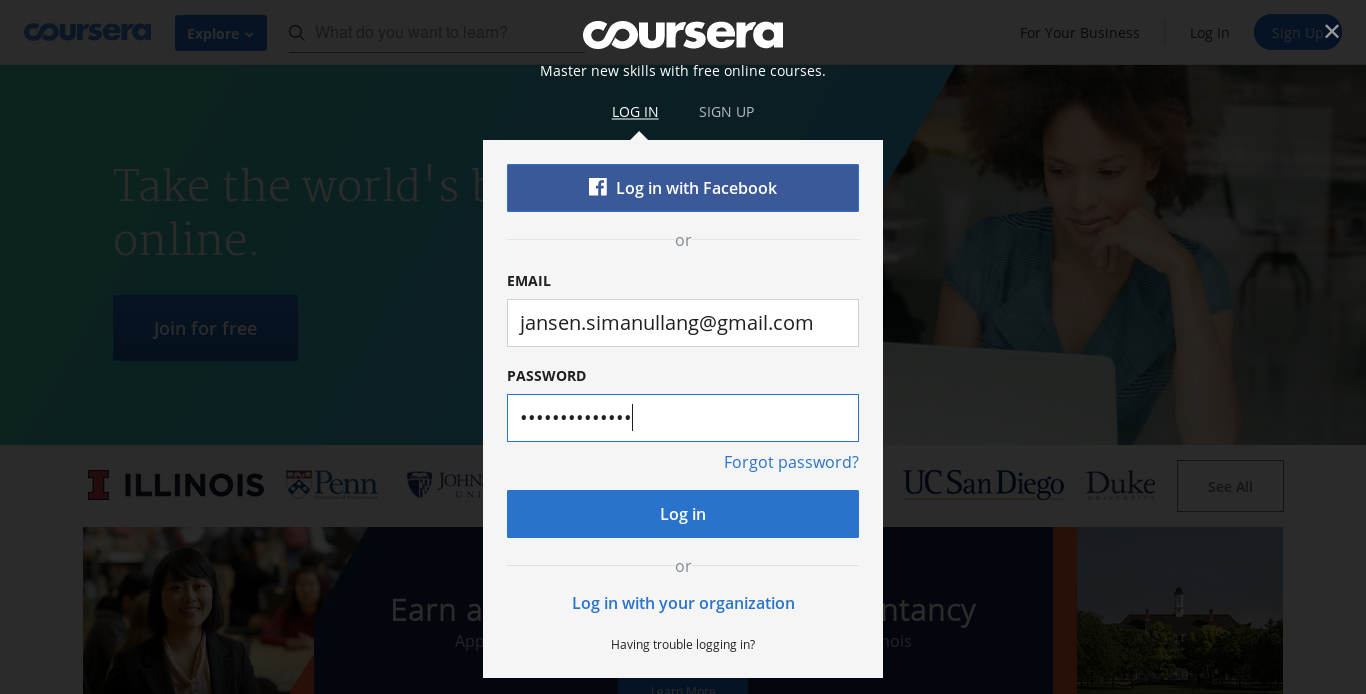

In [13]:
screenshot()

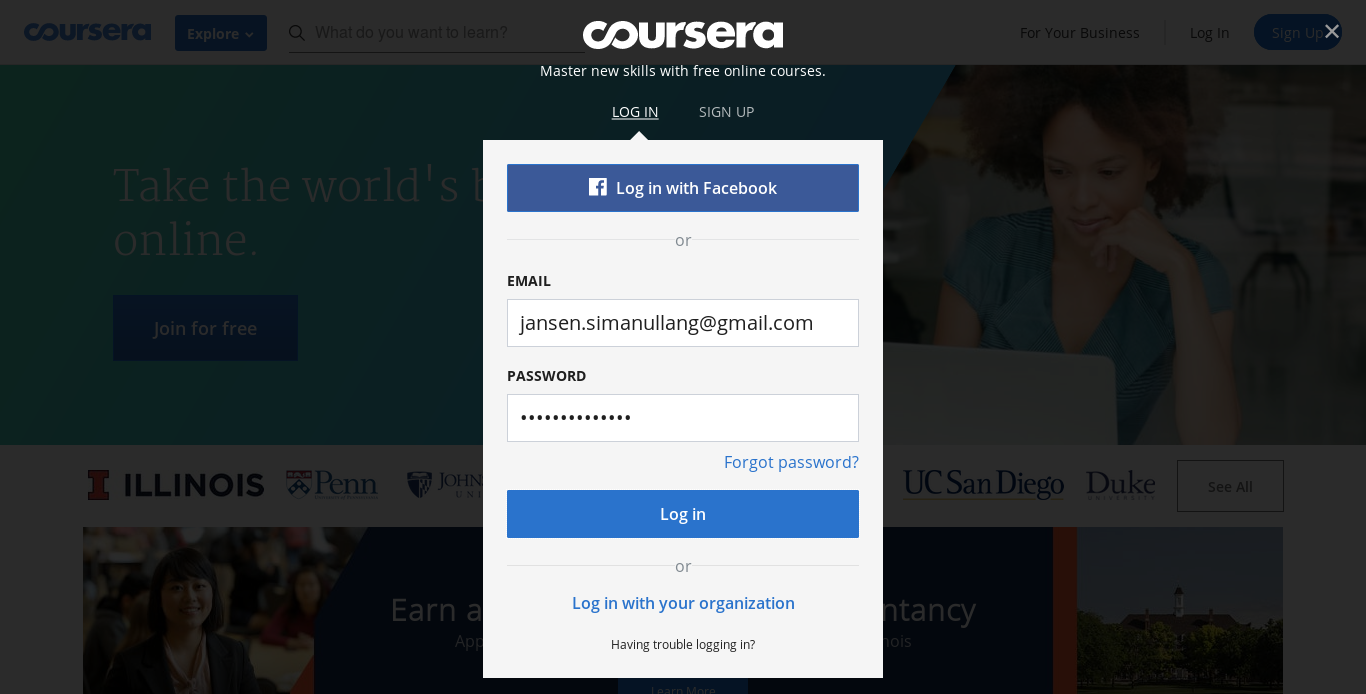

In [14]:
buttons = browser.find_by_tag('button')
for button in buttons:
    if (button.text == 'Log in'):
        button.click()
        break
screenshot()

### LAST ACTIVE COURSES

In [15]:
browser.visit(homepage)
section = browser.find_by_tag('section')
titles = []

for s in section:
    title = s.find_by_tag('h4').text
    titles.append(title)
    
for i, title in enumerate(titles):
    print(i+1, title)

1 Applied Text Mining in Python
2 Applied Plotting, Charting & Data Representation in Python
3 An Intuitive Introduction to Probability
4 Combinatorics and Probability
5 Data Visualization with Advanced Excel
6 Problem Solving with Excel
7 Data Management and Visualization
8 Big Data Analysis: Hive, Spark SQL, DataFrames and GraphFrames
9 Data Analysis Tools
10 Mastering Data Analysis in Excel
11 Exploratory Data Analysis
12 Exploratory Data Analysis
13 Reproducible Research


In [ ]:
screenshot()

There are {{len(titles)}} courses visible in this section you can pick to download.

### PICK ONE OF THE COURSES and edit here

In [16]:
#Pick one of the courses by number
chosen_course = 1 #<--- edit here 
section[chosen_course-1].click()

 ### {{ titles[chosen_course-1] }}

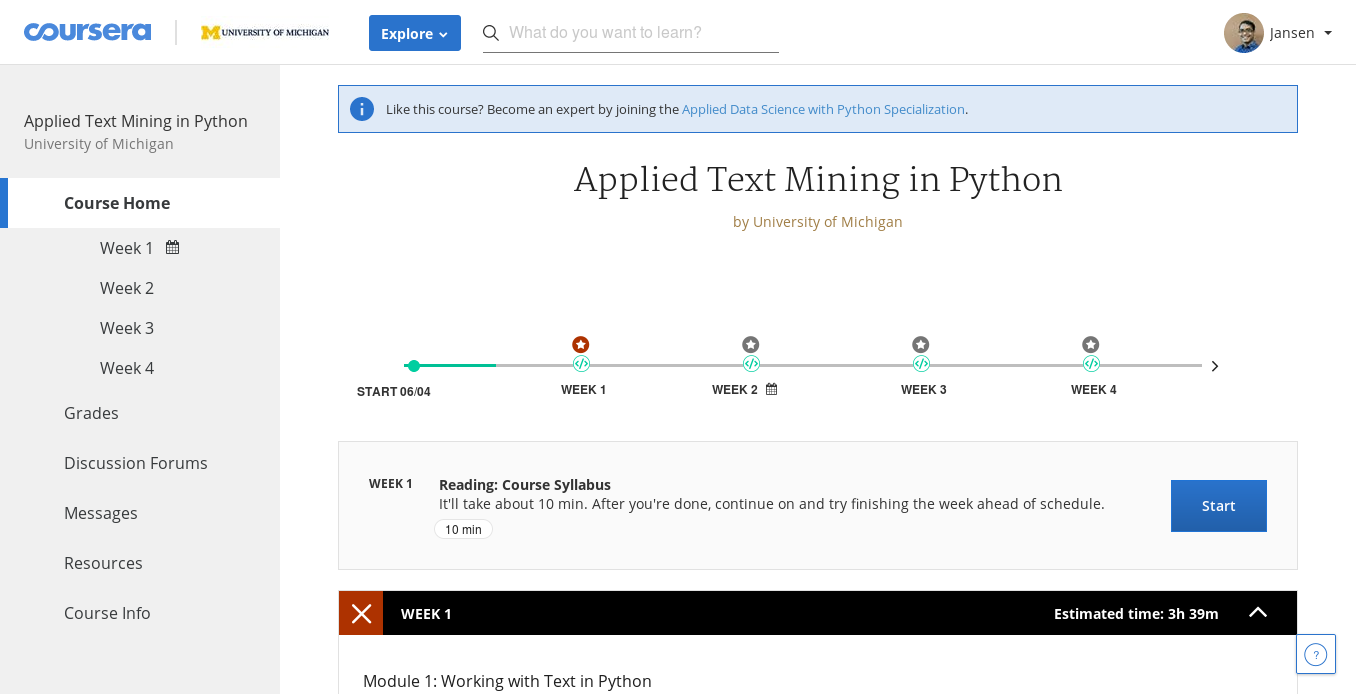

In [17]:
screenshot()

In [18]:
lecture_homepage = browser.driver.current_url
lecture_homepage

'https://www.coursera.org/learn/python-text-mining/home/welcome'

### Download Only Videos

In [ ]:
get_lectures()

Lecture 1 Basic Natural Language Processing
/learn/python-text-mining/lecture/AZCCB/basic-natural-language-processing

Lecture 3 Basic NLP tasks with NLTK
/learn/python-text-mining/lecture/KD8uN/basic-nlp-tasks-with-nltk

Lecture 4 Advanced NLP tasks with NLTK
/learn/python-text-mining/lecture/wWEVW/advanced-nlp-tasks-with-nltk

currently downloading: Lecture_1_Basic_Natural_Language_Processing.mp4
currently downloading: Lecture_3_Basic_NLP_tasks_with_NLTK.mp4
currently downloading: Lecture_4_Advanced_NLP_tasks_with_NLTK.mp4
Lecture 1 Text Classification
/learn/python-text-mining/lecture/H05Dd/text-classification

Lecture 2 Identifying Features from Text
/learn/python-text-mining/lecture/8nUhf/identifying-features-from-text

Lecture 3 Naive Bayes Classifiers
/learn/python-text-mining/lecture/zV9nP/naive-bayes-classifiers

Lecture 4 Naive Bayes Variations
/learn/python-text-mining/lecture/LX8Bw/naive-bayes-variations

Lecture 5 Support Vector Machines
/learn/python-text-mining/lecture/e

In [ ]:
screenshot()

In [ ]:
browser.quit()